In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [2]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')
matches = pd.read_csv('matches_updated_mens_ipl.csv')

In [3]:
deliveries.head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
matches.head(1)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591


In [5]:
df = deliveries.copy()
df.head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field',
       'retired out'], dtype=object)

In [7]:
def wicket_type(player_dismissed, dismissal_kind):
    if type(dismissal_kind) != str:
        return 0
    elif ~(type(dismissal_kind) != str) & (dismissal_kind not in ['run out', 'retired hurt', 'obstructing the field']):
        return 1
    else:
        return 0

In [8]:
df['isBowlerwkt_type'] = df.apply(lambda x: wicket_type(x['player_dismissed'], x['dismissal_kind']), axis = 1)

In [9]:
df.head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerwkt_type
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
df[df.dismissal_kind == 'run out'].head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerwkt_type
199,1082591,2,11.4,11,4,Royal Challengers Bangalore,Sunrisers Hyderabad,KM Jadhav,TM Head,MC Henriques,1,0,NaN,NaN,NaN,NaN,NaN,run out,KM Jadhav,0


In [11]:
df[df.dismissal_kind == 'lbw'].head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerwkt_type
289,1082592,1,6.5,6,5,Mumbai Indians,Rising Pune Supergiant,JC Buttler,N Rana,Imran Tahir,0,0,NaN,NaN,NaN,NaN,NaN,lbw,JC Buttler,1


# Customized Function
 TO get BPD, BPB, DOT%, Economy, Bowling Average, Bowling StrikeRate

In [12]:
def balls_per_dismissals(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1
    
def balls_per_boundaries(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1
    
def get_dot_percentage(dots,balls):
    if balls > 0:
        return dots/balls
    else:
        return 0
        
def runs_per_balls(runs, balls):
    if balls > 0:
        return runs/ balls
    else:
        return math.inf
    
def runs_per_dismissals(runs, dismissals):
    if dismissals > 0:
        return runs/dismissals
    else:
        return math.inf

In [13]:
df.columns

Index(['matchId', 'inning', 'over_ball', 'over', 'ball', 'batting_team',
       'bowling_team', 'batsman', 'non_striker', 'bowler', 'batsman_runs',
       'extras', 'isWide', 'isNoBall', 'Byes', 'LegByes', 'Penalty',
       'dismissal_kind', 'player_dismissed', 'isBowlerwkt_type'],
      dtype='object')

In [14]:
def bowler_stats(df):
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['bowler'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs': 'runs'})
    balls = pd.DataFrame(df.groupby(['bowler'])['matchId'].count().reset_index()).rename(columns = {'matchId' : 'balls'})
    innings = pd.DataFrame(df.groupby(['bowler'])['matchId'].apply(lambda x : len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId': 'innings'})
    dismissals = pd.DataFrame(df.groupby(['bowler'])['isBowlerwkt_type'].sum().reset_index()).rename(columns = {'isBowlerwkt_type' : 'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum().reset_index()).rename(columns = {'isDot': 'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum().reset_index()).rename(columns = {'isOne': 'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum().reset_index()).rename(columns = {'isTwo': 'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum().reset_index()).rename(columns = {'isThree': 'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum().reset_index()).rename(columns = {'isFour': 'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum().reset_index()).rename(columns = {'isSix': 'sixes'})
    
    df = pd.merge(innings, runs, on = 'bowler').merge(balls, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler').merge(ones, on = 'bowler').merge(twos, on = 'bowler').merge(threes, on = 'bowler').merge(fours, on = 'bowler').merge(sixes, on = 'bowler')
    
    df['Dot%'] = df.apply(lambda x: get_dot_percentage(x['dots'],x['balls'])*100, axis = 1)
    df['Avg'] = df.apply(lambda x: runs_per_dismissals(x['runs'],x['dismissals']), axis = 1)
    df['SR'] = df.apply(lambda x: balls_per_dismissals(x['balls'],x['dismissals']), axis = 1)
    df['Eco'] = df.apply(lambda x: runs_per_balls(x['runs'],x['balls'])*6, axis = 1)
    df['BPB'] = df.apply(lambda x: balls_per_boundaries(x['balls'], (x['fours'] + x['sixes'])), axis = 1)
    
    return df

In [15]:
statsdf = bowler_stats(df)
statsdf.head(1)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,Avg,SR,Eco,BPB
0,A Ashish Reddy,20,386,270,18,89,110,23,2,26,20,32.962963,21.444444,15.0,8.577778,5.869565


In [16]:
statsdf.sort_values('Dot%', ascending=False).head(10)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,Avg,SR,Eco,BPB
23,AC Gilchrist,1,0,1,1,1,0,0,0,0,0,100.000000,0.000000,1.000000,0.000000,1.000000
226,LA Carseldine,1,5,7,1,5,1,0,0,1,0,71.428571,5.000000,7.000000,4.285714,7.000000
409,SS Mundhe,1,5,7,1,5,1,0,0,1,0,71.428571,5.000000,7.000000,4.285714,7.000000
285,NB Singh,2,14,25,1,17,6,0,0,2,0,68.000000,14.000000,25.000000,3.360000,12.500000
408,SS Iyer,1,7,6,0,4,1,0,0,0,1,66.666667,inf,6.000000,7.000000,6.000000
397,SM Harwood,3,61,67,3,41,12,5,1,6,2,61.194030,20.333333,22.333333,5.462687,8.375000
423,Shoaib Akhtar,3,50,46,5,27,8,3,0,6,2,58.695652,10.000000,9.200000,6.521739,5.750000
327,R Sanjay Yadav,1,21,14,0,8,1,1,0,3,1,57.142857,inf,14.000000,9.000000,3.500000
245,M Pathirana,2,41,48,2,27,13,2,0,6,0,56.250000,20.500000,24.000000,5.125000,8.000000
131,FH Edwards,6,144,150,5,84,36,8,0,20,2,56.000000,28.800000,30.000000,5.760000,6.818182


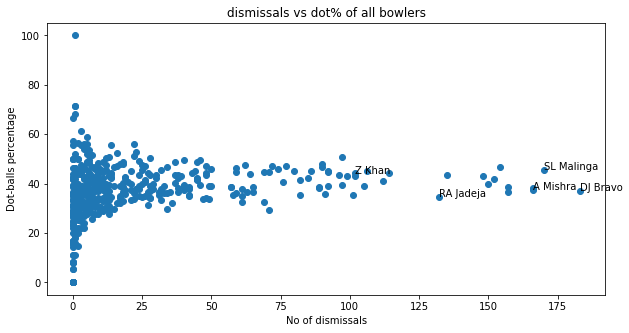

In [17]:
plt.figure(figsize =(10,5))
plt.scatter(statsdf['dismissals'],statsdf['Dot%'])
plt.ylabel('Dot-balls percentage')
plt.xlabel('No of dismissals')
plt.title('dismissals vs dot% of all bowlers')

annotations = list(statsdf['bowler'])
selected_players = ['SL Malinga', 'A Mishra', 'RA Jadeja', 'Z Khan', 'DJ Bravo']

for i,j in enumerate(annotations):
    if j in selected_players:
        plt.annotate(j, (statsdf['dismissals'][i], statsdf['Dot%'][i]))
        
plt.show()

## Different phases of play

In [18]:
def phase(over):
    if over <= 5:
        return 'Powerplay'
    elif over <= 14:
        return 'Middle-over'
    else:
        return 'Death-over'

In [19]:
df['phase'] = df['over'].apply(lambda x: phase(x))
df.head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerwkt_type,isDot,isOne,isTwo,isThree,isFour,isSix,phase
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,Powerplay


In [20]:
def PhaseofPlay(df, current_phase):
    
    df = df[df.phase == current_phase]
    df.reset_index(drop = True, inplace = True)
    
    isDot = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    isOne = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    isTwo = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    isThree = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    isFour = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    isSix = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['bowler'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs': 'runs'})
    innings = pd.DataFrame(df.groupby(['bowler'])['matchId'].apply(lambda x:len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId': 'innings'})
    balls = pd.DataFrame(df.groupby(['bowler'])['matchId'].count().reset_index()).rename(columns = {'matchId': 'balls'})
    dismissals = pd.DataFrame(df.groupby(['bowler'])['isBowlerwkt_type'].sum().reset_index()).rename(columns = {'isBowlerwkt_type': 'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum().reset_index()).rename(columns = {'isDot' : 'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum().reset_index()).rename(columns = {'isOne' : 'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum().reset_index()).rename(columns = {'isTwo' : 'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum().reset_index()).rename(columns = {'isThree' : 'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum().reset_index()).rename(columns = {'isFour' : 'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum().reset_index()).rename(columns = {'isSix' : 'sixes'})
    
    df = pd.merge(innings, runs, on='bowler').merge(balls, on='bowler').merge(dismissals, on='bowler').merge(dots, on='bowler').merge(ones, on='bowler').merge(twos, on='bowler').merge(threes, on='bowler').merge(fours, on='bowler').merge(sixes, on='bowler')
    
    df['Dot%'] = df.apply(lambda x: get_dot_percentage(x['dots'], x['balls'])*100, axis=1)
    df['SR'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis= 1)
    df['Avg'] = df.apply(lambda x: runs_per_dismissals(x['runs'], x['dismissals']), axis=1)
    df['Eco'] = df.apply(lambda x: runs_per_balls(x['balls'], x['runs'])*6, axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundaries(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    
    return df

In [21]:
pp_df = PhaseofPlay(df, 'Powerplay')
mid_df = PhaseofPlay(df, 'Middle-over')
dth_df = PhaseofPlay(df, 'Death-over')

In [22]:
pp_df.head(1)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,SR,Avg,Eco,BPB
0,A Ashish Reddy,1,20,6,0,2,0,0,0,2,2,33.333333,6.0,inf,1.8,1.5


In [23]:
mid_df.head(1)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,SR,Avg,Eco,BPB
0,A Ashish Reddy,17,203,159,7,55,68,11,1,17,7,34.591195,22.714286,29.0,4.699507,6.625


In [24]:
dth_df.head(1)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,SR,Avg,Eco,BPB
0,A Ashish Reddy,13,163,105,11,32,42,12,1,7,11,30.47619,9.545455,14.818182,3.865031,5.833333


In [25]:
def get_innings(df, current_innings):
    
    df = df[df.inning == current_innings]
    df.reset_index(drop = True, inplace = True)
    
    isDot = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    isOne = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    isTwo = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    iThree = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    isFour = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    isSix = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['bowler'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['bowler'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    balls = pd.DataFrame(df.groupby(['bowler'])['matchId'].count().reset_index()).rename(columns = {'matchId':'balls'})
    dismissals =pd.DataFrame(df.groupby(['bowler'])['isBowlerwkt_type'].sum().reset_index()).rename(columns = {'isBowlerwkt_type':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum().reset_index()).rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum().reset_index()).rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum().reset_index()).rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum().reset_index()).rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum().reset_index()).rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum().reset_index()).rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on='bowler').merge(balls, on='bowler').merge(dismissals, on='bowler').merge(dots, on='bowler').merge(ones, on='bowler').merge(twos, on='bowler').merge(threes, on='bowler').merge(fours, on='bowler').merge(sixes, on='bowler')
    
    df['Dot%'] = df.apply(lambda x: get_dot_percentage(x['dots'], x['balls'])*100, axis=1)
    df['Avg'] = df.apply(lambda x: runs_per_dismissals(x['runs'], x['dismissals']), axis=1)
    df['Eco'] = df.apply(lambda x: runs_per_balls(x['balls'], x['runs'])*6, axis=1)
    df['SR'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundaries(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    
    return df

In [26]:
ing1_df = get_innings(df, 1)
ing2_df = get_innings(df, 2)

In [27]:
ing1_df.tail(1)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,Avg,Eco,SR,BPB
427,Z Khan,51,1483,1240,50,538,410,82,4,169,36,43.387097,29.66,5.016858,24.8,6.04878


In [28]:
ing2_df.head(1)

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,Avg,Eco,SR,BPB
0,A Ashish Reddy,12,246,172,11,58,68,15,2,16,13,33.72093,22.363636,4.195122,15.636364,5.931034


### DJ Barvo performance against all teams

In [29]:
def is_out(player_dismissed):
    try:
        x = math.isnan(player_dismissed)
        return 0
    except:
        return 1

In [30]:
df['isOut'] = df['player_dismissed'].apply(lambda x: is_out(x))
df.tail(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerwkt_type,isDot,isOne,isTwo,isThree,isFour,isSix,phase,isOut
225952,981019,2,19.5,19,5,Royal Challengers Bangalore,Sunrisers Hyderabad,Sachin Baby,Iqbal Abdulla,B Kumar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,Death-over,0
225953,981019,2,19.6,19,6,Royal Challengers Bangalore,Sunrisers Hyderabad,Iqbal Abdulla,Sachin Baby,B Kumar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,Death-over,0


In [31]:
selected_player = 'DJ Bravo'

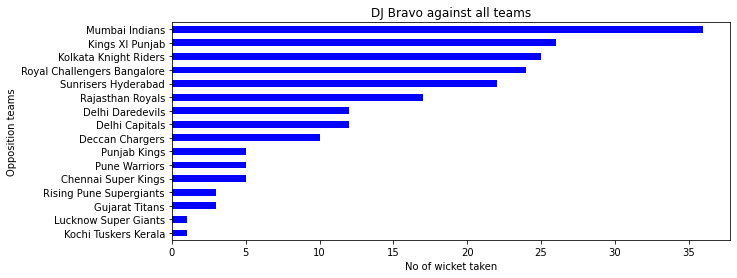

In [32]:
plt.figure(figsize = (10,4))
df[df['bowler'] == selected_player].groupby(['batting_team'])['isOut'].sum().sort_values().plot(kind = 'barh', color = 'b')
plt.title(selected_player + ' ' + 'against all teams')
plt.xlabel('No of wicket taken')
plt.ylabel('Opposition teams')
plt.show()

# venue analysis

In [33]:
def wintoss_winmatch(toss_decision, team1, team2, winner):
    if toss_decision == 'field':
        if team2 == winner:
            return True
        else:
            return False 
    else:
        if team1 == winner:
            return True
        else:
            return False

In [34]:
mdf = matches.copy()
mdf['wintoss_winmatch'] = mdf.apply(lambda x: wintoss_winmatch(x['toss_decision'], x['team1'], x['team2'], x['winner']), axis = 1)
mdf.head(2)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId,wintoss_winmatch
0,NaN,Indian Premier League,2017-04-05,male,N Pandit,Sunrisers Hyderabad,Royal Challengers Bangalore,NJ Llong,J Srinath,2017,Royal Challengers Bangalore,35.0,6,Yuvraj Singh,NaN,NaN,"Rajiv Gandhi International Stadium, Uppal",NaN,field,Hyderabad,A Deshmukh,NaN,Sunrisers Hyderabad,AY Dandekar,1.0,NaN,NaN,1082591,False
1,NaN,Indian Premier League,2017-04-06,male,Navdeep Singh,Rising Pune Supergiant,Rising Pune Supergiant,S Ravi,M Nayyar,2017,Mumbai Indians,NaN,6,SPD Smith,NaN,NaN,Maharashtra Cricket Association Stadium,NaN,field,Pune,VK Sharma,NaN,Rising Pune Supergiant,A Nand Kishore,2.0,NaN,7.0,1082592,False


In [35]:
mdf[['season', 'team1', 'team2', 'wintoss_winmatch']].head()

,season,team1,team2,wintoss_winmatch
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,False
1,2017,Rising Pune Supergiant,Mumbai Indians,False
2,2017,Gujarat Lions,Kolkata Knight Riders,True
3,2017,Kings XI Punjab,Rising Pune Supergiant,False
4,2017,Royal Challengers Bangalore,Delhi Daredevils,True


In [36]:
print('percentage of wintoss-winmatch =', 100*len(mdf[mdf.wintoss_winmatch == 1])/len(mdf))

percentage of wintoss-winmatch = 52.73684210526316


In [37]:
season_df = pd.DataFrame(mdf.groupby('season')['wintoss_winmatch'].sum().sort_values())
season_df

,wintoss_winmatch
season,
2020/21,25
2007/08,28
2015,28
2014,29
2016,31
2017,32
2018,32
2009,34
2019,34


In [38]:
def isOut(player_dismissed):
    try:
        x = math.isnan(player_dismissed)
        return 0
    except:
        return 1

In [39]:
def venueAnalysis(mdf, df):
    
    runs = pd.DataFrame(df.groupby(['matchId', 'inning'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'total_runs'})
    runs['Id_Ing'] = runs.apply(lambda x: str(x['matchId']) + '-' + str(x['inning']), axis = 1)
    
    balls = pd.DataFrame(df.groupby(['matchId', 'inning'])['batsman_runs'].count().reset_index()).rename(columns = {'batsman_runs':'total_balls'})
    balls['Id_Ing'] = balls.apply(lambda x: str(x['matchId']) + '-' + str(x['inning']), axis = 1)
    
    df['isOut'] = df['player_dismissed'].apply(lambda x: isOut(x))
    outs = pd.DataFrame(df.groupby(['matchId', 'inning'])['isOut'].sum().reset_index()).rename(columns = {'isOut':'wickets'})
    outs['Id_Ing'] = outs.apply(lambda x: str(x['matchId']) + '-' + str(x['inning']), axis = 1)
    
    df = pd.merge(runs, balls[['Id_Ing', 'total_balls']], on = 'Id_Ing').merge(outs[['Id_Ing', 'wickets']], on = 'Id_Ing')
    
    mdf = mdf.rename(columns = {'matchId':'matchId'})
    df = pd.merge(df, mdf[['matchId', 'venue']], on = 'matchId')
    df = df[['matchId', 'venue', 'inning', 'total_runs', 'total_balls', 'wickets']]
    
    return df

In [40]:
ven_df = venueAnalysis(mdf, df)
ven_df.head()

,matchId,venue,inning,total_runs,total_balls,wickets
0,335982,M Chinnaswamy Stadium,1,205,124,3
1,335982,M Chinnaswamy Stadium,2,63,101,10
2,335983,"Punjab Cricket Association Stadium, Mohali",1,234,124,5
3,335983,"Punjab Cricket Association Stadium, Mohali",2,196,124,4
4,335984,Feroz Shah Kotla,1,122,122,8


In [41]:
pd.DataFrame(ven_df.groupby('venue')['total_runs'].mean().sort_values(ascending = False)).rename(columns = {'total_runs':'Avg_Runs'}).reset_index().head(20)

,venue,Avg_Runs
0,"Eden Gardens, Kolkata",180.750000
1,"Arun Jaitley Stadium, Delhi",179.375000
2,Punjab Cricket Association IS Bindra Stadium,166.700000
3,M.Chinnaswamy Stadium,163.200000
4,Brabourne Stadium,163.150000
5,"Brabourne Stadium, Mumbai",161.676471
6,"Wankhede Stadium, Mumbai",156.919355
7,Barabati Stadium,156.785714
8,"Punjab Cricket Association IS Bindra Stadium, Mohali",155.272727
9,"Dr DY Patil Sports Academy, Mumbai",154.975000


In [42]:
selected_venue = 'MA Chidambaram Stadium'

In [43]:
ven_df[ven_df['venue'] == selected_venue].head()

,matchId,venue,inning,total_runs,total_balls,wickets
1292,1136565,MA Chidambaram Stadium,1,197,123,6
1293,1136565,MA Chidambaram Stadium,2,198,123,5
1404,1175356,MA Chidambaram Stadium,1,66,104,10
1405,1175356,MA Chidambaram Stadium,2,66,110,3
1428,1175367,MA Chidambaram Stadium,1,168,126,5


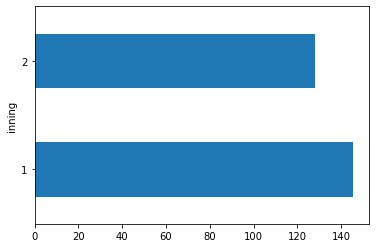

In [44]:
ven_df[ven_df['venue'] == selected_venue].groupby(['inning'])['total_runs'].mean()[:2].plot(kind = 'barh')
plt.show()

In [45]:
comb_df = df.merge(mdf[['matchId', 'venue']], on = 'matchId', how = 'left')
comb_df.head(1)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isBowlerwkt_type,isDot,isOne,isTwo,isThree,isFour,isSix,phase,isOut,venue
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"


In [46]:
def ByCustomVenue(df, selceted_venue):
       
    df = df[df.venue == selected_venue]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['bowler'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'runs'})
    innings = pd.DataFrame(df.groupby(['bowler'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    balls = pd.DataFrame(df.groupby(['bowler'])['matchId'].count().reset_index()).rename(columns = {'matchId':'balls'})
    dismissals =pd.DataFrame(df.groupby(['bowler'])['isBowlerwkt_type'].sum().reset_index()).rename(columns = {'isBowlerwkt_type':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['bowler'])['isDot'].sum()).reset_index().rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['bowler'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['bowler'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['bowler'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['bowler'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['bowler'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on = 'bowler').merge(balls, on = 'bowler').merge(dismissals, on = 'bowler').merge(dots, on = 'bowler').merge(ones, on = 'bowler').merge(twos, on = 'bowler').merge(threes, on = 'bowler').merge(fours, on = 'bowler').merge(sixes, on = 'bowler')
    
    df['Dot%'] = df.apply(lambda x: get_dot_percentage(x['dots'], x['balls'])*100, axis=1)
    df['Avg'] = df.apply(lambda x: runs_per_dismissals(x['runs'], x['dismissals']), axis=1)
    df['Eco'] = df.apply(lambda x: runs_per_balls(x['balls'], x['runs'])*6, axis=1)
    df['SR'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundaries(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    
    return df

In [47]:
sven_df = ByCustomVenue(comb_df, selected_venue)
sven_df.head()

,bowler,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,Dot%,Avg,Eco,SR,BPB
0,A Mishra,1,16,18,0,6,10,1,0,1,0,33.333333,inf,6.750000,18.0,18.0
1,AD Russell,1,35,24,0,7,11,2,0,2,2,29.166667,inf,4.114286,24.0,6.0
2,AJ Tye,1,37,25,0,8,11,1,0,3,2,32.000000,inf,4.054054,25.0,5.0
3,AR Patel,1,31,18,1,6,7,0,0,3,2,33.333333,31.0,3.483871,18.0,3.6
4,AS Roy,1,8,15,1,7,8,0,0,0,0,46.666667,8.0,11.250000,15.0,15.0


In [48]:
sven_df[['Dot%', 'Avg', 'SR', 'Eco']].mean()

Dot%    41.045567
Avg     inf      
SR      19.999686
Eco     6.152303 
dtype: float64

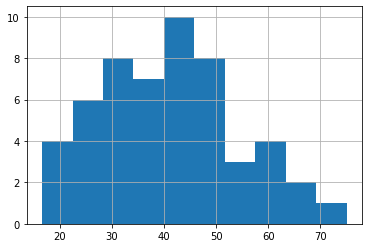

In [49]:
sven_df['Dot%'].hist()
plt.show()

In [50]:
df1 = deliveries.copy()
mdf1 = matches.copy()

In [51]:
def balls_per_boundary(balls, boundaries):
    if boundaries > 0:
        return balls/boundaries
    else:
        return balls/1
    
def balls_per_dismissals(balls, dismissals):
    if dismissals > 0:
        return balls/dismissals
    else:
        return balls/1

In [52]:
def playerStats(df):
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs':'runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count().reset_index()).rename(columns = {'matchId':'balls'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'innings'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed':'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum().reset_index()).rename(columns = {'isDot':'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum().reset_index()).rename(columns = {'isOne':'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum().reset_index()).rename(columns = {'isTwo':'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum().reset_index()).rename(columns = {'isThree':'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum().reset_index()).rename(columns = {'isFour':'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum().reset_index()).rename(columns = {'isSix':'sixes'})
    
    df = pd.merge(innings, runs, on='batsman').merge(balls, on='batsman').merge(dismissals, on='batsman').merge(dots, on='batsman').merge(ones, on='batsman').merge(twos, on='batsman').merge(threes, on='batsman').merge(fours, on='batsman').merge(sixes, on='batsman')
    
    df['SR'] = df.apply(lambda x: 100*(x['runs']/x['balls']), axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    df['BPD'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis=1)
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis=1)
    
    return df

In [53]:
sdf = playerStats(df1)
sdf.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,BPB,BPD,RPI
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,6.322581,13.066667,12.173913
1,A Badoni,11,161,139,9,57,53,11,0,11,7,115.827338,7.722222,15.444444,14.636364


In [54]:
def Phase(over):
    if over <= 5:
        return 'Powerplay'
    elif over <= 14:
        return 'Middle-over'
    else:
        return 'Death-over'

In [55]:
df1['phase'] = df.over.apply(lambda x: Phase(x))
df1.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed,isDot,isOne,isTwo,isThree,isFour,isSix,phase
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay


In [56]:
def BatPhasePlay(df, current_phase):
    
    df = df[df.phase == current_phase]
    df.reset_index(drop = True, inplace = True)
    
    isDot = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    isOne = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    isTwo = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    isThree = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    isFour = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    isSix = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum().reset_index()).rename(columns = {'batsman_runs': 'runs'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x:len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId': 'innings'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count().reset_index()).rename(columns = {'matchId': 'balls'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count().reset_index()).rename(columns = {'player_dismissed': 'dismissals'})
    
    dots = pd.DataFrame(df.groupby(['batsman'])['isDot'].sum().reset_index()).rename(columns = {'isDot' : 'dots'})
    ones = pd.DataFrame(df.groupby(['batsman'])['isOne'].sum().reset_index()).rename(columns = {'isOne' : 'ones'})
    twos = pd.DataFrame(df.groupby(['batsman'])['isTwo'].sum().reset_index()).rename(columns = {'isTwo' : 'twos'})
    threes = pd.DataFrame(df.groupby(['batsman'])['isThree'].sum().reset_index()).rename(columns = {'isThree' : 'threes'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum().reset_index()).rename(columns = {'isFour' : 'fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum().reset_index()).rename(columns = {'isSix' : 'sixes'})
    
    df = pd.merge(innings, runs, on='batsman').merge(balls, on='batsman').merge(dismissals, on='batsman').merge(dots, on='batsman').merge(ones, on='batsman').merge(twos, on='batsman').merge(threes, on='batsman').merge(fours, on='batsman').merge(sixes, on='batsman')
    
    df['SR'] = df.apply(lambda x: (x['runs']/x['balls'])*100, axis=1)
    df['BPD'] = df.apply(lambda x: balls_per_dismissals(x['balls'], x['dismissals']), axis= 1)
    df['RPI'] = df.apply(lambda x: x['runs']/x['innings'], axis=1)
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['balls'], (x['fours'] + x['sixes'])), axis=1)
    
    return df

In [57]:
pdf = BatPhasePlay(df1, 'Powerplay')
midf = BatPhasePlay(df1, 'Middle-over')
ddf = BatPhasePlay(df1, 'Death-over')

In [58]:
pdf.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,BPD,RPI,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,7.0,5.0,7.0
1,A Badoni,2,1,7,1,6,1,0,0,0,0,14.285714,7.0,0.5,7.0


In [59]:
midf.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,BPD,RPI,BPB
0,A Ashish Reddy,5,61,41,0,16,13,5,0,2,5,148.780488,41.000000,12.200000,5.857143
1,A Badoni,6,59,59,3,24,25,4,0,5,1,100.000000,19.666667,9.833333,9.833333


In [60]:
ddf.head(2)

,batsman,innings,runs,balls,dismissals,dots,ones,twos,threes,fours,sixes,SR,BPD,RPI,BPB
0,A Ashish Reddy,22,214,148,14,40,69,15,1,13,10,144.594595,10.571429,9.727273,6.434783
1,A Badoni,7,101,73,5,27,27,7,0,6,6,138.356164,14.600000,14.428571,6.083333


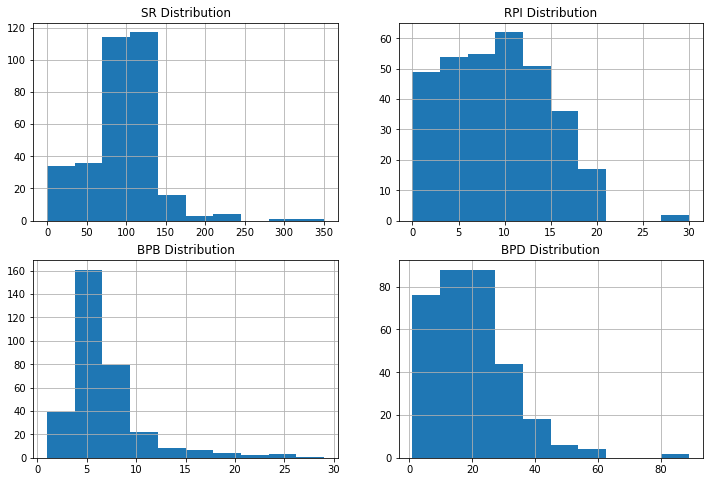

In [63]:
plt.figure(figsize = (12,8))

plt.subplot(221)
pdf.SR.hist()
plt.title('SR Distribution')

plt.subplot(222)
pdf.RPI.hist()
plt.title('RPI Distribution')

plt.subplot(223)
pdf.BPB.hist()
plt.title('BPB Distribution')

plt.subplot(224)
pdf.BPD.hist()
plt.title('BPD Distribution')

plt.show()

In [64]:
wt_sr, wt_rpi, wt_bpd, wt_bpb = 0.39, 0.23, 0.14, 0.22

In [72]:
p_df = pdf[pdf['innings'] > 20]
p_df.reset_index(inplace = True, drop = True)

In [73]:
#step1: square of all values
p_df['calc_SR'] = p_df['SR'].apply(lambda x: x*x) 
p_df['calc_RPI'] = p_df['RPI'].apply(lambda x: x*x) 
p_df['calc_BPD'] = p_df['BPD'].apply(lambda x: x*x) 
p_df['calc_BPB'] = p_df['BPB'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_bpb = np.sqrt(p_df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_BPB']].sum(axis = 0))

p_df['calc_SR'] = p_df['calc_SR'].apply(lambda x: x/sq_sr) 
p_df['calc_RPI'] = p_df['calc_RPI'].apply(lambda x: x/sq_rpi) 
p_df['calc_BPD'] = p_df['calc_BPD'].apply(lambda x: x/sq_bpd) 
p_df['calc_BPB'] = p_df['calc_BPB'].apply(lambda x: x/sq_bpb)

p_df['calc_SR'] = p_df['calc_SR'].apply(lambda x: x*wt_sr) 
p_df['calc_RPI'] = p_df['calc_RPI'].apply(lambda x: x*wt_rpi) 
p_df['calc_BPD'] = p_df['calc_BPD'].apply(lambda x: x*wt_bpd) 
p_df['calc_BPB'] = p_df['calc_BPB'].apply(lambda x: x*wt_bpb)

best_sr, worst_sr = max(p_df['calc_SR']), min(p_df['calc_SR'])
best_rpi, worst_rpi = max(p_df['calc_RPI']), min(p_df['calc_RPI'])
best_bpd, worst_bpd = max(p_df['calc_BPD']), min(p_df['calc_BPD'])
best_bpb, worst_bpb = min(p_df['calc_BPB']), max(p_df['calc_BPB'])

In [74]:
p_df['dev_best_SR'] = p_df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr)) 
p_df['dev_best_RPI'] = p_df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi)) 
p_df['dev_best_BPD'] = p_df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd)) 
p_df['dev_best_BPB'] = p_df['calc_BPB'].apply(lambda x: (x-best_bpb)*(x-best_bpb))

p_df['dev_best_sqrt'] = p_df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_BPB'], axis = 1) 

p_df['dev_worst_SR'] = p_df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr)) 
p_df['dev_worst_RPI'] = p_df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi)) 
p_df['dev_worst_BPD'] = p_df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd)) 
p_df['dev_worst_BPB'] = p_df['calc_BPB'].apply(lambda x: (x-worst_bpb)*(x-worst_bpb))

p_df['dev_worst_sqrt'] = p_df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_BPB'], axis = 1) 

In [75]:
p_df['score'] = p_df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [76]:
p_df[['batsman', 'score']].head()

,batsman,score
0,AB de Villiers,0.254692
1,AC Gilchrist,0.459494
2,AJ Finch,0.148884
3,AM Rahane,0.169145
4,AT Rayudu,0.089495


In [77]:
p_df[[ 'batsman','innings', 'runs', 'balls', 'dismissals', 'fours', 'sixes', 'SR', 'BPB', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head(25)

,batsman,innings,runs,balls,dismissals,fours,sixes,SR,BPB,score
0,SP Narine,42,665,400,34,86,38,166.250000,3.225806,0.953081
1,JM Bairstow,36,695,487,16,88,30,142.710472,4.127119,0.771257
2,PP Shaw,63,1129,787,39,155,35,143.456163,4.142105,0.766828
3,CA Lynn,40,779,553,17,99,37,140.867993,4.066176,0.741850
4,E Lewis,22,420,298,13,49,21,140.939597,4.257143,0.726558
5,YK Pathan,33,361,256,12,47,16,141.015625,4.063492,0.718694
6,JC Buttler,62,1230,882,26,157,55,139.455782,4.160377,0.717718
7,RA Tripathi,51,779,566,23,96,29,137.632509,4.528000,0.660753
8,SA Yadav,52,727,534,14,105,22,136.142322,4.204724,0.652952
9,V Sehwag,103,1593,1160,60,230,46,137.327586,4.202899,0.647690


# From the above top 25 pinch hitter in the PowerPlay the top 5 batters are:
* Sunil Narine
* Prithiv Shaw
* Jhonny Bairstow
* Chris Lynn
* Evan Lewis